# Preprocessing for Felipe

In [276]:
# Classes for female ratio

In [264]:
def female_ratio_classes(x):
    if x==0:
        return 0
    if x<1:
        return 1
    if x==1:
        return 2

In [265]:
companies["female_ratio"] = companies["female_ratio"].map(female_ratio_classes)

# Data Analysis

In [9]:
import pandas as pd
import numpy as np
import os
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from invesscience.joanna_merge_2 import get_training_data 

In [4]:
companies = get_training_data(reference="a")

        id  mean_comp_worked_before
0      c:1                     0.50
1   c:1001                     0.75
2  c:10015                     0.00
3   c:1003                     0.50
4  c:10054                     0.00
        id    normalized_name    category_code founded_at  \
0   c:1349      move networks         software        NaT   
1   c:4584        modern feed      games_video 2007-01-01   
2  c:16612  micron technology    semiconductor 1978-01-01   
3     c:28              cisco  network_hosting 1984-01-01   
4     c:29              yahoo              web 1994-01-01   

                                         description closed_at    status  \
0  software Move Networks is a streaming tech pla...       NaN  acquired   
1  games_video     [Modern Feed](http://www.moder...       NaN  acquired   
2  semiconductor   Semiconductor Applications Mic...       NaN       ipo   
3  network_hosting     Cisco designs and sells ha...       NaN       ipo   
4  web   News and On-line directory Y

In [5]:
companies.head()

,id,normalized_name,category_code,founded_at,description,closed_at,status,exit,exit_date,country_code,...,top_50,top_5_bool,top_20_bool,top_50_bool,n_female_founders,female_ratio,mean_comp_founded_ever,mean_comp_founded_before,mean_comp_worked_before,target
0,c:1349,move networks,software,NaT,software Move Networks is a streaming tech pla...,NaN,acquired,acquisition,1987-06-16 00:00:00,USA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,c:4584,modern feed,games_video,2007-01-01,games_video [Modern Feed](http://www.moder...,NaN,acquired,acquisition,1987-06-16 00:00:00,USA,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1
2,c:16612,micron technology,semiconductor,1978-01-01,semiconductor Semiconductor Applications Mic...,NaN,ipo,ipo,1990-01-02 00:00:00,USA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,c:28,cisco,network_hosting,1984-01-01,network_hosting Cisco designs and sells ha...,NaN,ipo,ipo,1990-02-23 00:00:00,USA,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
4,c:29,yahoo,web,1994-01-01,web News and On-line directory Yahoo was fou...,NaN,ipo,ipo,1996-04-12 00:00:00,USA,...,0.2,1.0,0.0,1.0,0.0,0.0,1.2,0.0,0.0,1


In [6]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3241 entries, 0 to 3240
Data columns (total 41 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   id                         3241 non-null   object        
 1   normalized_name            3241 non-null   object        
 2   category_code              3115 non-null   object        
 3   founded_at                 2642 non-null   datetime64[ns]
 4   description                3239 non-null   object        
 5   closed_at                  360 non-null    object        
 6   status                     3241 non-null   object        
 7   exit                       3241 non-null   object        
 8   exit_date                  797 non-null    object        
 9   country_code               3118 non-null   object        
 10  state_code                 2241 non-null   object        
 11  date_series_a              3241 non-null   datetime64[ns]
 12  partic

In [7]:
companies.columns

Index(['id', 'normalized_name', 'category_code', 'founded_at', 'description',
       'closed_at', 'status', 'exit', 'exit_date', 'country_code',
       'state_code', 'date_series_a', 'participants_a', 'raised_amount_usd_a',
       'timediff_founded_series_a', 'rounds_before_a', 'raised_before_a',
       'participants_before_a', 'phd', 'MBA', 'cs', 'graduate', 'undergrad',
       'professional', 'degree_count', 'MBA_bool', 'cs_bool', 'phd_bool',
       'founder_count', 'top_5', 'top_20', 'top_50', 'top_5_bool',
       'top_20_bool', 'top_50_bool', 'n_female_founders', 'female_ratio',
       'mean_comp_founded_ever', 'mean_comp_founded_before',
       'mean_comp_worked_before', 'target'],
      dtype='object')

In [8]:
companies.describe()

,participants_a,raised_amount_usd_a,timediff_founded_series_a,rounds_before_a,raised_before_a,participants_before_a,phd,MBA,cs,graduate,...,top_50,top_5_bool,top_20_bool,top_50_bool,n_female_founders,female_ratio,mean_comp_founded_ever,mean_comp_founded_before,mean_comp_worked_before,target
count,3241.000000,3.241000e+03,2642.000000,3241.000000,3.165000e+03,3138.000000,1600.000000,1600.000000,1600.000000,1600.000000,...,1600.000000,1600.000000,1600.000000,1600.000000,1558.000000,1558.000000,1600.000000,1600.00000,1599.000000,3241.000000
mean,1.804690,6.457364e+06,2.515884,0.136069,2.341804e+05,0.203314,0.064089,0.115167,0.140729,0.175931,...,0.062000,0.171250,0.093750,0.096875,0.078947,0.042908,1.063940,0.03193,0.110255,0.247763
std,1.504865,1.459416e+07,3.710009,0.384496,2.341051e+06,0.909744,0.227481,0.283128,0.302385,0.360518,...,0.210467,0.376845,0.291572,0.295880,0.313770,0.174852,0.228445,0.14861,0.321650,0.431780
min,0.000000,0.000000e+00,-35.247815,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000
25%,1.000000,1.600000e+06,0.668049,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000
50%,1.000000,3.956128e+06,1.527752,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000
75%,2.000000,7.000000e+06,3.249896,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000
max,18.000000,4.000000e+08,60.086107,4.000000,1.000000e+08,21.000000,2.000000,2.000000,1.000000,3.000000,...,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000,3.000000,1.50000,4.000000,1.000000


# General

## Categories

In [11]:
pivot_categories = pd.pivot_table(companies, values='id', index=["category_code"],
                    columns=['exit'], aggfunc= "count", margins = True)
pivot_categories = pivot_categories.fillna(0).sort_values(by = "All", ascending=False)
pivot_categories.acquisition = pivot_categories.acquisition/pivot_categories.All
pivot_categories.ipo = pivot_categories.ipo/pivot_categories.All
pivot_categories["no exit"] = pivot_categories["no exit"]/pivot_categories.All

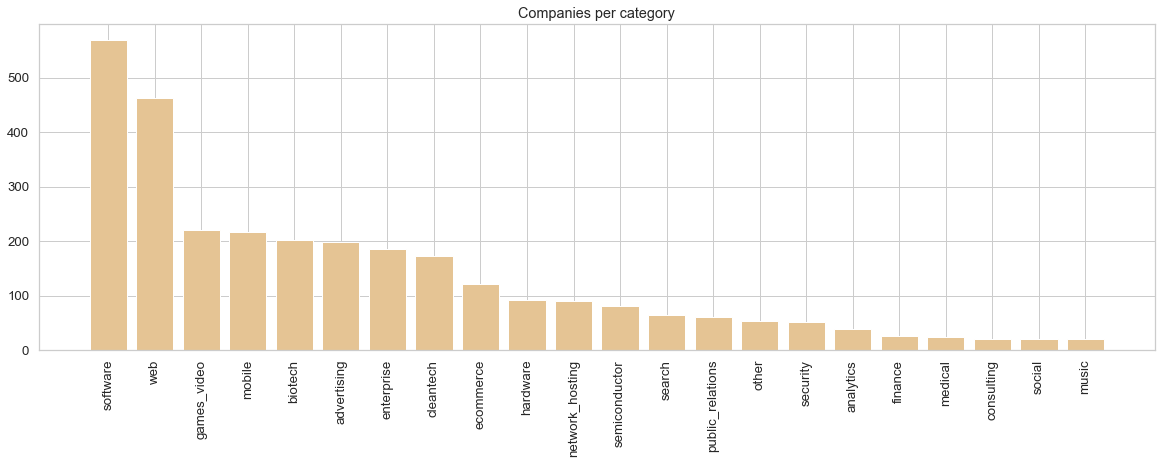

In [13]:
plt.figure(figsize=(20,6))
plt.bar(pivot_categories.head(23).drop("All").index,height=pivot_categories.head(23).drop("All")["All"], color=sns.color_palette("Set2")[6])
plt.xticks(rotation=90)
plt.title("Companies per category")
plt.show()

### Predictors of IPO
- +: social, search, security
- -: hardware, public_relations, analytics, finance, medical, consulting

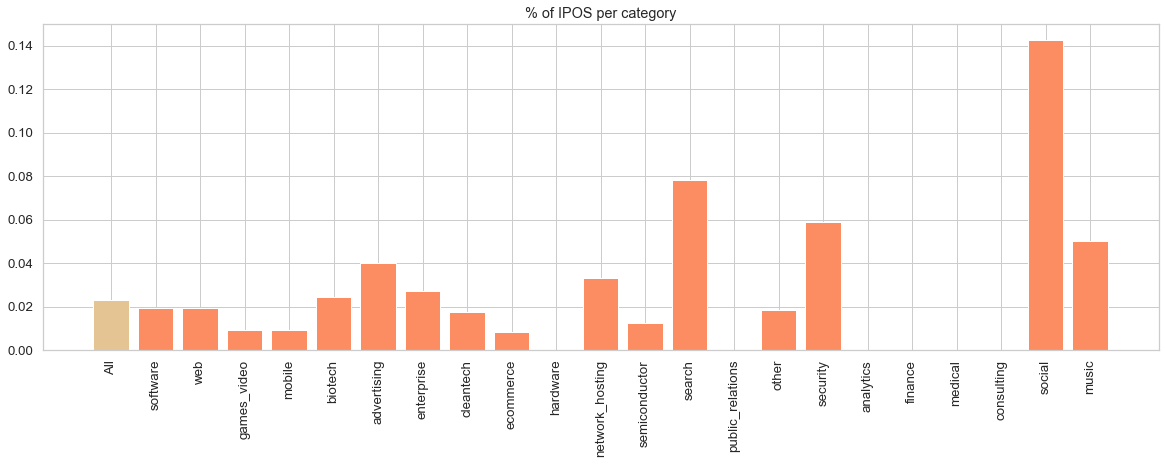

In [53]:
colors = [sns.color_palette("Set2")[6]]
colors.extend(22*[sns.color_palette("Set2")[1]])
plt.figure(figsize=(20,6))
plt.bar(pivot_categories.head(23).index,height=pivot_categories["ipo"].head(23), color=colors)
plt.xticks(rotation=90)
plt.title("% of IPOS per category")
plt.show()

### Predictors of Acquisition
- +: network hosting, web, mobile
- -: biotech, cleantech, medical

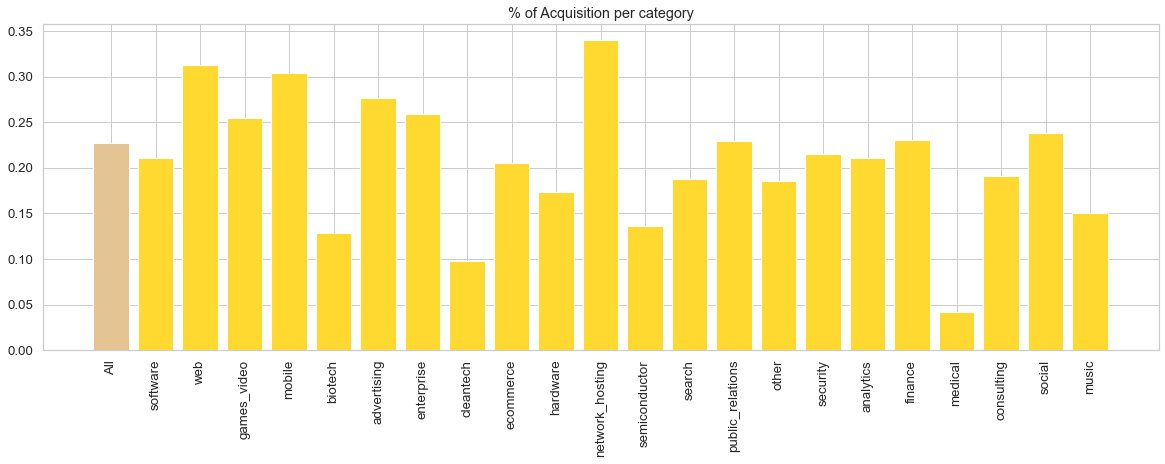

In [112]:
colors = [sns.color_palette("Set2")[6]]
colors.extend(22*[sns.color_palette("Set2")[5]])
plt.figure(figsize=(20,6))
plt.bar(pivot_categories.head(23).index,height=pivot_categories["acquisition"].head(23), color=colors)
plt.xticks(rotation=90)
plt.title("% of Acquisition per category")
plt.show()

### Predictors of no exit
- +: medical, biotech, cleantech
- -: network hosting, social

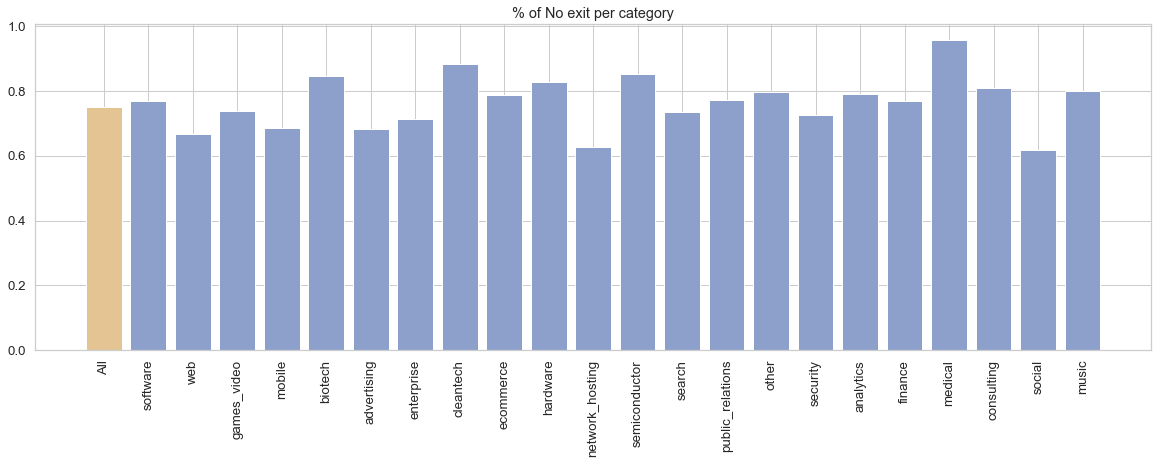

In [60]:
colors = [sns.color_palette("Set2")[6]]
colors.extend(22*[sns.color_palette("Set2")[2]])
plt.figure(figsize=(20,6))
plt.bar(pivot_categories.head(23).index,height=pivot_categories["no exit"].head(23), color=colors)
plt.xticks(rotation=90)
plt.title("% of No exit per category")
plt.show()

### Conclusion: to use as categorical features
- **for two classes** : medical, biotech, cleantech, network hosting, social
- **for 3 classes** : 2 classes + web, mobile, search, security, hardware, public_relations, finance, consulting, analytics

## Foundation Date

In [62]:
companies["founded_year"] = companies.founded_at.dt.strftime('%Y')

In [63]:
pivot_founded = pd.pivot_table(companies, values='id', index=["founded_year"],
                    columns=['exit'], aggfunc= "count", margins = True)
pivot_founded = pivot_founded.fillna(0).sort_values(by = "All", ascending=False)
pivot_founded.acquisition = pivot_founded.acquisition/pivot_founded.All
pivot_founded.ipo = pivot_founded.ipo/pivot_founded.All
pivot_founded["no exit"] = pivot_founded["no exit"]/pivot_founded.All

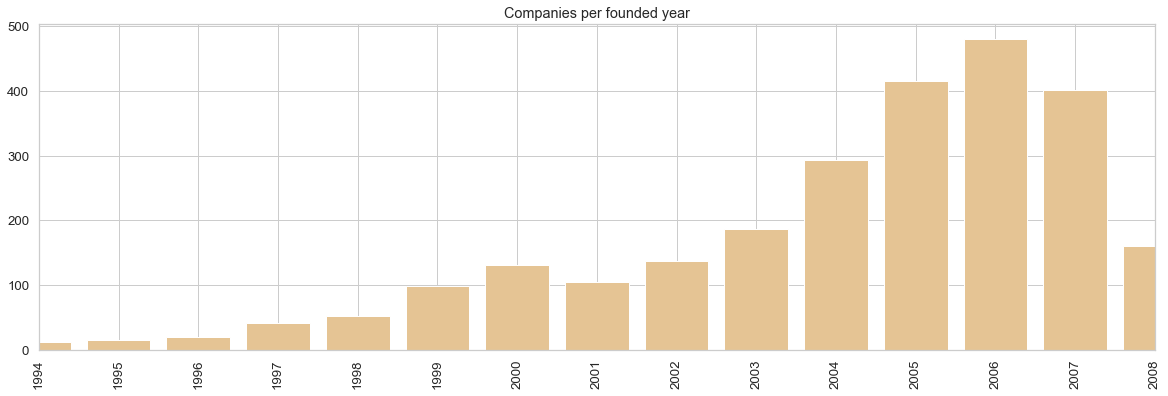

In [70]:
plt.figure(figsize=(20,6))
plt.bar(pivot_founded.sort_index().drop("All").index,height=pivot_founded.sort_index().drop("All")["All"], color=sns.color_palette("Set2")[6])
plt.xticks(rotation=90)
plt.xlim("1994", "2008")
plt.title("Companies per founded year")
plt.show()

### Predictors of IPO
- +: 1996, 1998, 1999
- -: 2002, 2007

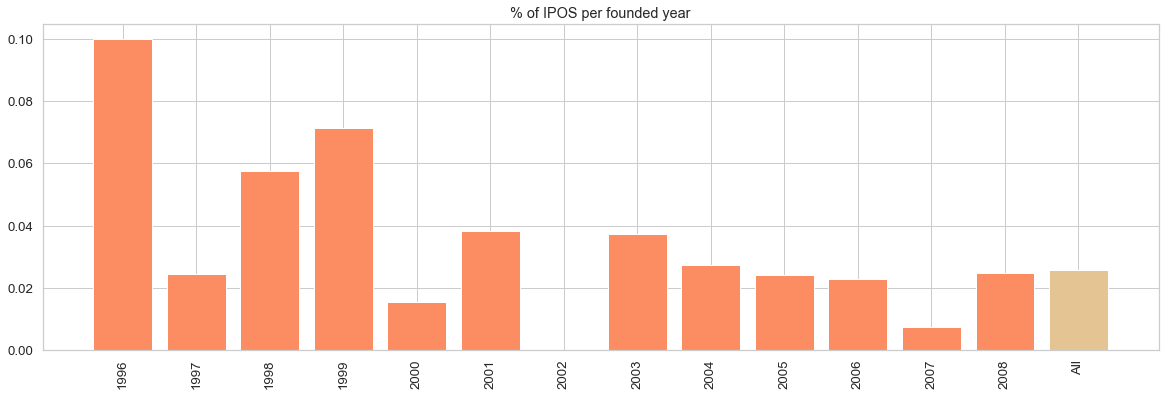

In [85]:
colors = 13*[sns.color_palette("Set2")[1]]
colors.extend([sns.color_palette("Set2")[6]])
plt.figure(figsize=(20,6))
plt.bar(pivot_founded.head(14).sort_index().index,height=pivot_founded["ipo"].head(14).sort_index(), color=colors)
plt.xticks(rotation=90)
plt.title("% of IPOS per founded year")
plt.show()

### Predictors of Acquisition
- +: 1997, 2000
- -: 2007, 2008

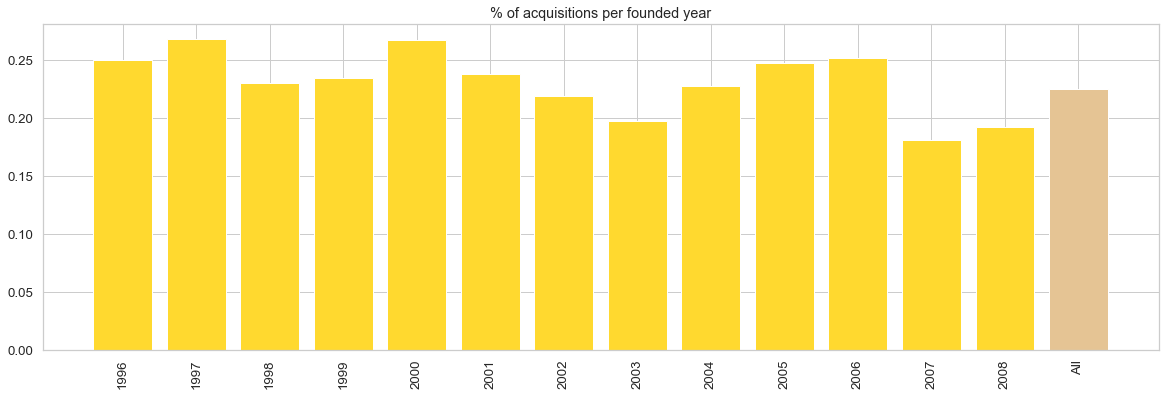

In [110]:
colors = 13*[sns.color_palette("Set2")[5]]
colors.extend([sns.color_palette("Set2")[6]])
plt.figure(figsize=(20,6))
plt.bar(pivot_founded.head(14).sort_index().index,height=pivot_founded["acquisition"].head(14).sort_index(), color=colors)
plt.xticks(rotation=90)
plt.title("% of acquisitions per founded year")
plt.show()

### Predictors of No exit
- +: 1996
- -: 2002, 2007, 2008

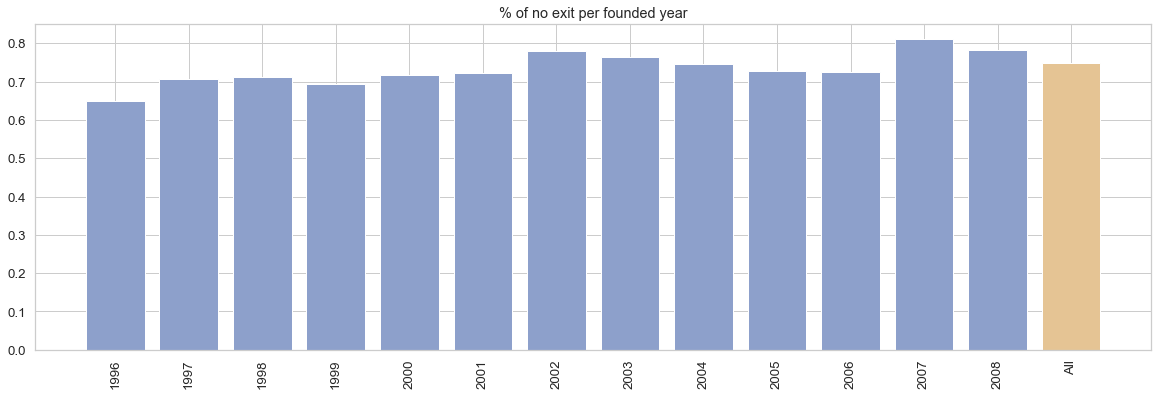

In [99]:
colors = 13*[sns.color_palette("Set2")[2]]
colors.extend([sns.color_palette("Set2")[6]])
plt.figure(figsize=(20,6))
plt.bar(pivot_founded.head(14).sort_index().index,height=pivot_founded["no exit"].head(14).sort_index(), color=colors)
plt.xticks(rotation=90)
plt.title("% of no exit per founded year")
plt.show()

### Conclusion: to use as categorical features
- **for two classes** : 1996, 2002, 2007, 2008
- **for 3 classes** : 2 classes + 1997, 1998, 1999, 2000

## Countries

In [93]:
pivot_countries = pd.pivot_table(companies, values='id', index=["country_code"],
                    columns=['exit'], aggfunc= "count", margins = True)
pivot_countries = pivot_countries.fillna(0).sort_values(by = "All", ascending=False)
pivot_countries.acquisition = pivot_countries.acquisition/pivot_countries.All
pivot_countries.ipo = pivot_countries.ipo/pivot_countries.All
pivot_countries["no exit"] = pivot_countries["no exit"]/pivot_countries.All

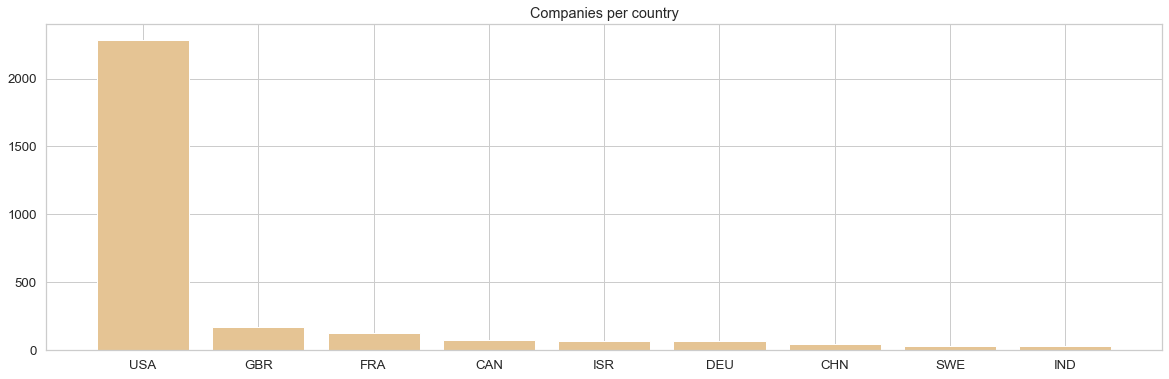

In [98]:
plt.figure(figsize=(20,6))
plt.bar(pivot_countries.head(10).drop("All").index,height=pivot_countries.head(10).drop("All")["All"], color=sns.color_palette("Set2")[6])
plt.title("Companies per country")
plt.show()

### Predictors of IPO
- +: USA
- -: CAN, SWE, IND

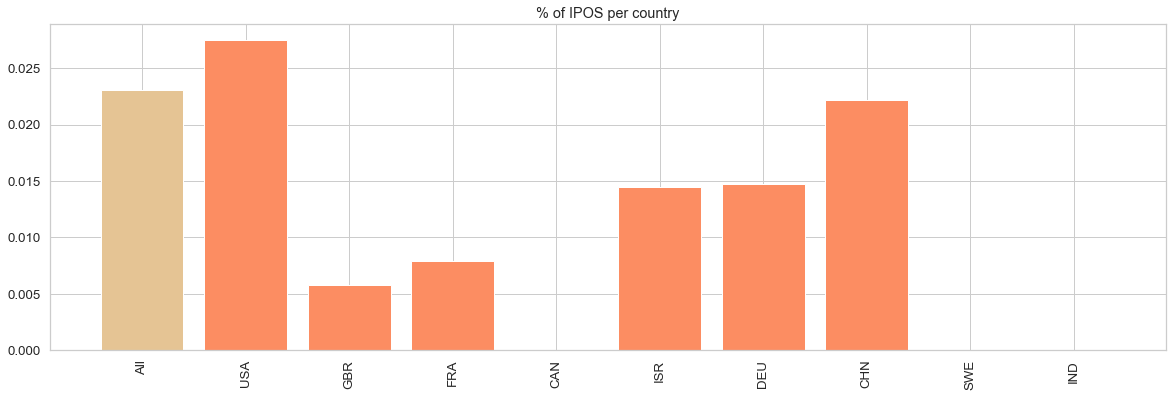

In [101]:
colors = [sns.color_palette("Set2")[6]]
colors.extend(9*[sns.color_palette("Set2")[1]])
plt.figure(figsize=(20,6))
plt.bar(pivot_countries.head(10).index,height=pivot_countries["ipo"].head(10), color=colors)
plt.xticks(rotation=90)
plt.title("% of IPOS per country")
plt.show()

### Predictors of Acquisition
- +: CAN, ISR
- -: FRA, CHN, IND, SWE

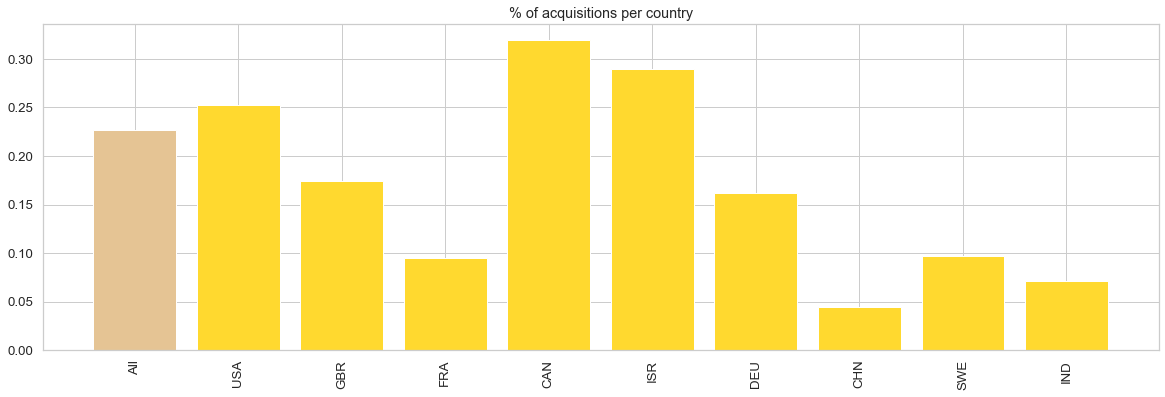

In [123]:
colors = [sns.color_palette("Set2")[6]]
colors.extend(9*[sns.color_palette("Set2")[5]])
plt.figure(figsize=(20,6))
plt.bar(pivot_countries.head(10).index,height=pivot_countries["acquisition"].head(10), color=colors)
plt.xticks(rotation=90)
plt.title("% of acquisitions per country")
plt.show()

### Predictors of no exit
- +: FRA, CHN, SWE, IND
- -: CAN, ISR

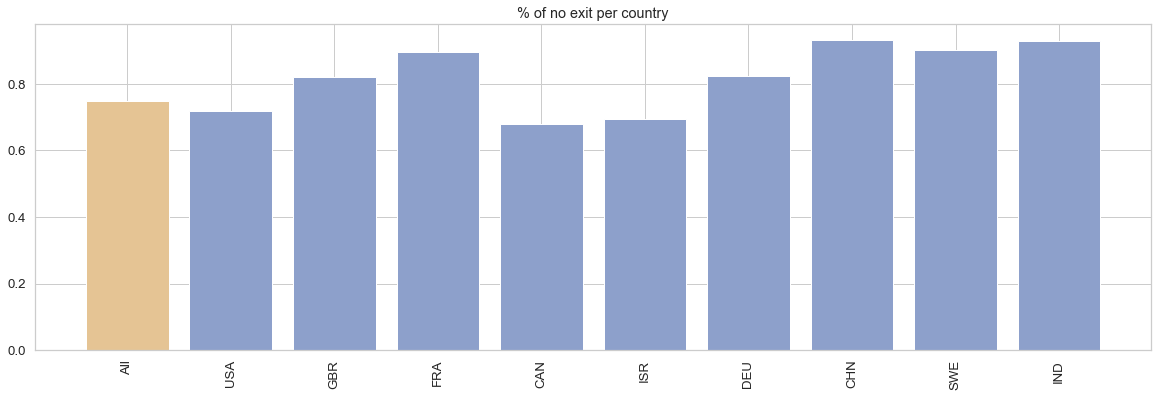

In [122]:
colors = [sns.color_palette("Set2")[6]]
colors.extend(9*[sns.color_palette("Set2")[2]])
plt.figure(figsize=(20,6))
plt.bar(pivot_countries.head(10).index,height=pivot_countries["no exit"].head(10), color=colors)
plt.xticks(rotation=90)
plt.title("% of no exit per country")
plt.show()

### Conclusion: to use as categorical features
FRA, CHN, SWE, IND, CAN, ISR, USA

## State Code

In [114]:
pivot_states = pd.pivot_table(companies, values='id', index=["state_code"],
                    columns=['exit'], aggfunc= "count", margins = True)
pivot_states = pivot_states.fillna(0).sort_values(by = "All", ascending=False)
pivot_states.acquisition = pivot_states.acquisition/pivot_states.All
pivot_states.ipo = pivot_states.ipo/pivot_states.All
pivot_states["no exit"] = pivot_states["no exit"]/pivot_states.All

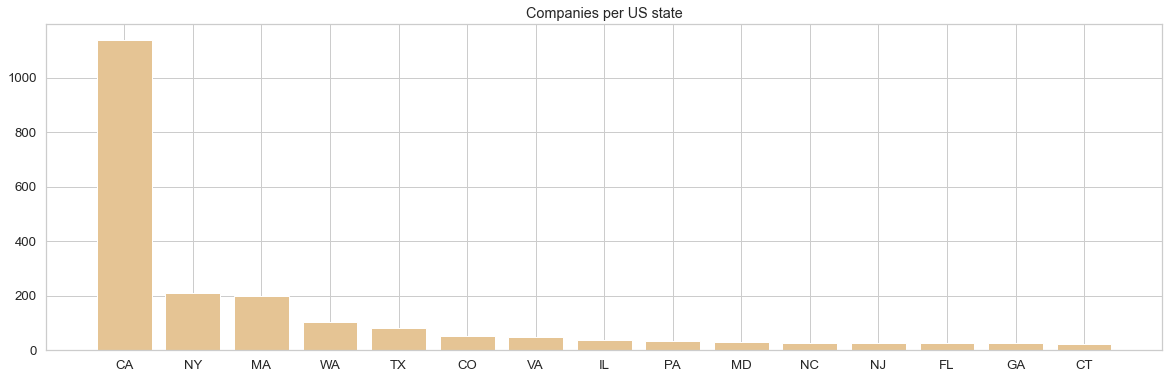

In [116]:
plt.figure(figsize=(20,6))
plt.bar(pivot_states.head(16).drop("All").index,height=pivot_states.head(16).drop("All")["All"], color=sns.color_palette("Set2")[6])
plt.title("Companies per US state")
plt.show()

### Predictors of IPO
- +: IL, PA
- -: CO, NJ, FL

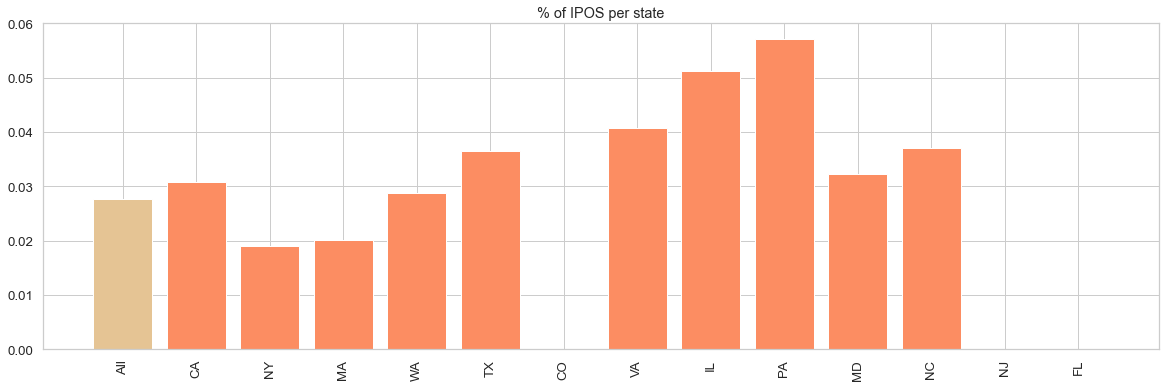

In [124]:
colors = [sns.color_palette("Set2")[6]]
colors.extend(13*[sns.color_palette("Set2")[1]])
plt.figure(figsize=(20,6))
plt.bar(pivot_states.head(14).index,height=pivot_states["ipo"].head(14), color=colors)
plt.xticks(rotation=90)
plt.title("% of IPOS per state")
plt.show()

### Predictors of Acquisition
- +: CA, WA
- -: PA, FL

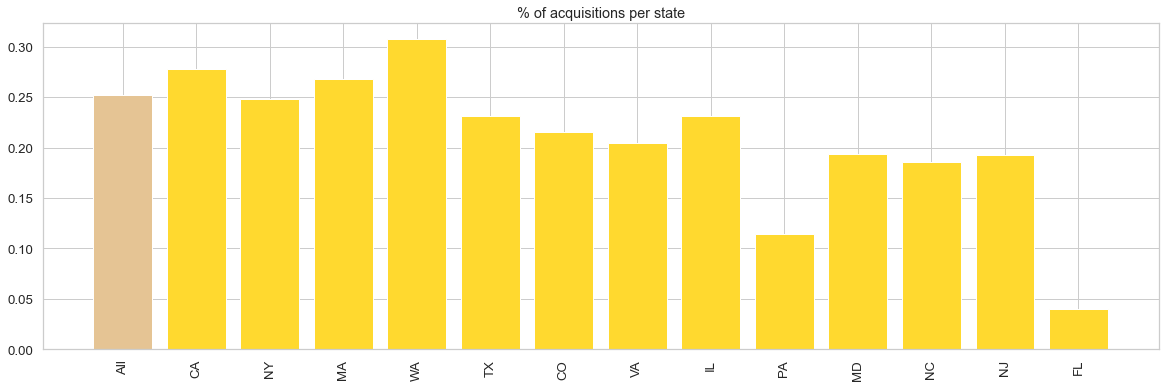

In [125]:
colors = [sns.color_palette("Set2")[6]]
colors.extend(13*[sns.color_palette("Set2")[5]])
plt.figure(figsize=(20,6))
plt.bar(pivot_states.head(14).index,height=pivot_states["acquisition"].head(14), color=colors)
plt.xticks(rotation=90)
plt.title("% of acquisitions per state")
plt.show()

### Predictors of no exit
- +: PA, FL
- -: WA, CA

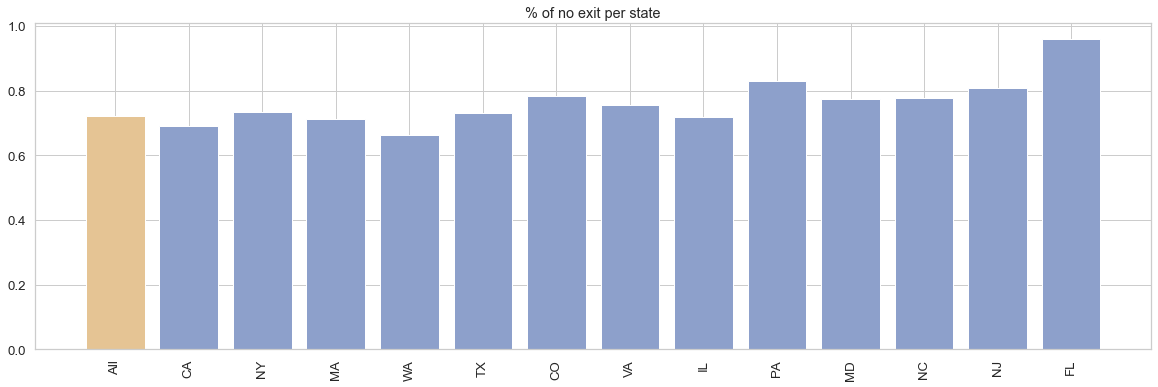

In [127]:
colors = [sns.color_palette("Set2")[6]]
colors.extend(13*[sns.color_palette("Set2")[2]])
plt.figure(figsize=(20,6))
plt.bar(pivot_states.head(14).index,height=pivot_states["no exit"].head(14), color=colors)
plt.xticks(rotation=90)
plt.title("% of no exit per state")
plt.show()

### Conclusion: to use as categorical features
- **2 classes**: PA, FL, WA, CA
- **3 classes**: 2 classes + IL, CO, NJ, FL

## State Code

In [114]:
pivot_states = pd.pivot_table(companies, values='id', index=["state_code"],
                    columns=['exit'], aggfunc= "count", margins = True)
pivot_states = pivot_states.fillna(0).sort_values(by = "All", ascending=False)
pivot_states.acquisition = pivot_states.acquisition/pivot_states.All
pivot_states.ipo = pivot_states.ipo/pivot_states.All
pivot_states["no exit"] = pivot_states["no exit"]/pivot_states.All

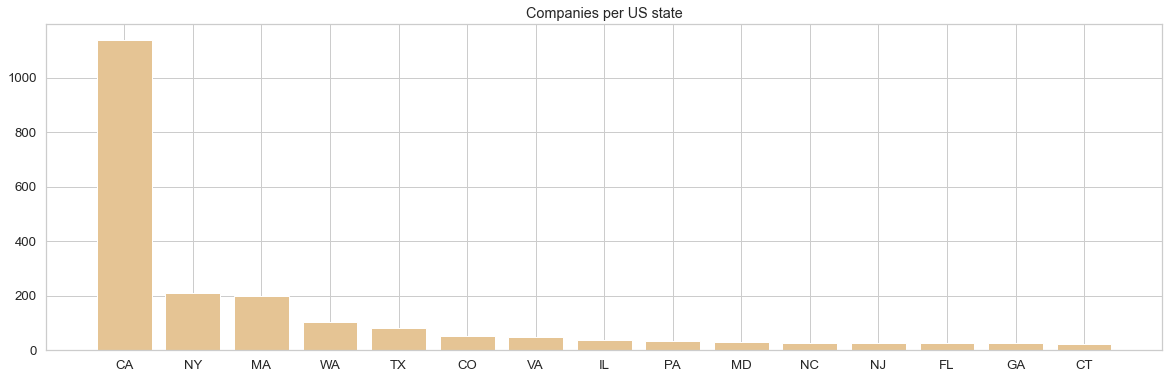

In [116]:
plt.figure(figsize=(20,6))
plt.bar(pivot_states.head(16).drop("All").index,height=pivot_states.head(16).drop("All")["All"], color=sns.color_palette("Set2")[6])
plt.title("Companies per US state")
plt.show()

### Predictors of IPO
- +: IL, PA
- -: CO, NJ, FL

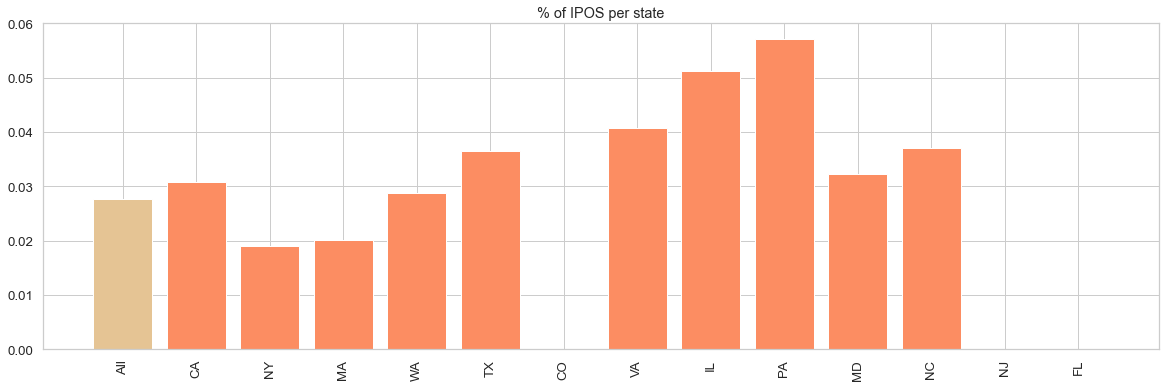

In [124]:
colors = [sns.color_palette("Set2")[6]]
colors.extend(13*[sns.color_palette("Set2")[1]])
plt.figure(figsize=(20,6))
plt.bar(pivot_states.head(14).index,height=pivot_states["ipo"].head(14), color=colors)
plt.xticks(rotation=90)
plt.title("% of IPOS per state")
plt.show()

### Predictors of Acquisition
- +: CA, WA
- -: PA, FL

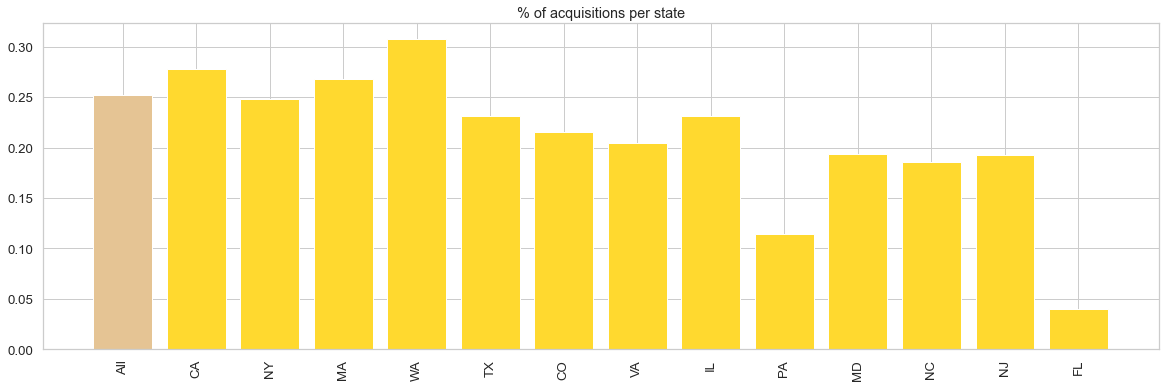

In [125]:
colors = [sns.color_palette("Set2")[6]]
colors.extend(13*[sns.color_palette("Set2")[5]])
plt.figure(figsize=(20,6))
plt.bar(pivot_states.head(14).index,height=pivot_states["acquisition"].head(14), color=colors)
plt.xticks(rotation=90)
plt.title("% of acquisitions per state")
plt.show()

### Predictors of no exit
- +: PA, FL
- -: WA, CA

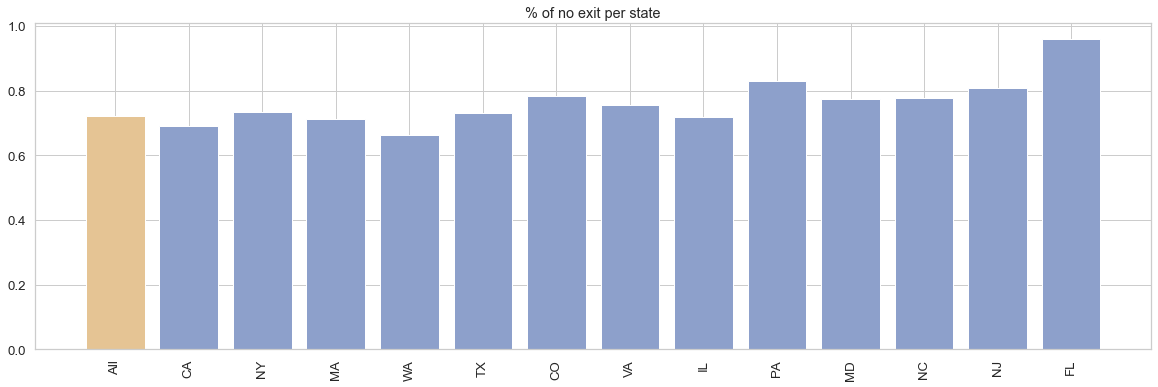

In [127]:
colors = [sns.color_palette("Set2")[6]]
colors.extend(13*[sns.color_palette("Set2")[2]])
plt.figure(figsize=(20,6))
plt.bar(pivot_states.head(14).index,height=pivot_states["no exit"].head(14), color=colors)
plt.xticks(rotation=90)
plt.title("% of no exit per state")
plt.show()

### Conclusion: to use as categorical features
- **2 classes**: PA, FL, WA, CA
- **3 classes**: 2 classes + IL, CO, NJ, FL

# Founders

In [152]:
companies.founder_count = companies.founder_count.map(lambda x: np.nan if x=="nan" else round(float(x)))

In [188]:
pivot_founders = pd.pivot_table(companies, values='id', index=["founder_count"],
                    columns=['exit'], aggfunc= "count", margins = True)
pivot_founders = pivot_founders.fillna(0).sort_values(by = "All", ascending=False)
pivot_founders.acquisition = pivot_founders.acquisition/pivot_founders.All
pivot_founders.ipo = pivot_founders.ipo/pivot_founders.All
pivot_founders["no exit"] = pivot_founders["no exit"]/pivot_founders.All

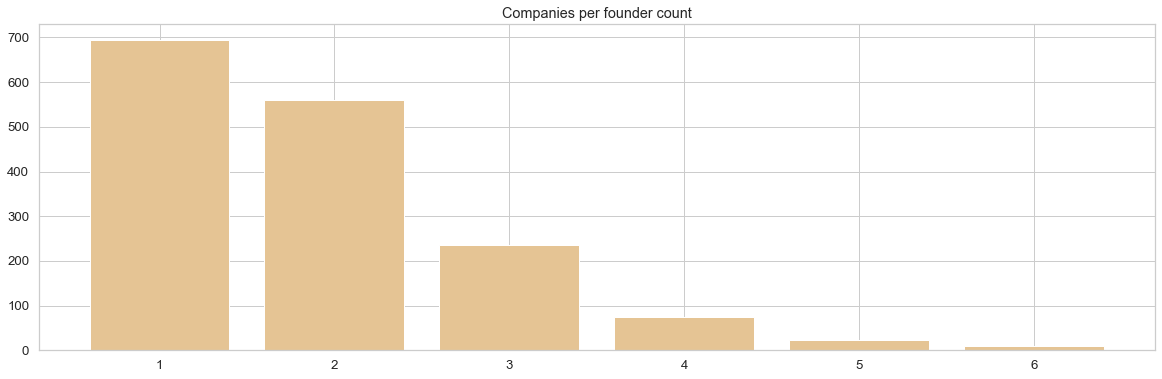

In [219]:
plt.figure(figsize=(20,6))
plt.bar(pivot_founders.head(7).drop("All").index,height=pivot_founders.head(7).drop("All")["All"], color=sns.color_palette("Set2")[6])
plt.title("Companies per founder count")
plt.show()

### Predictors of IPO
> seems like the trend is growing but what about 4 & 6 ? Should we do classification 1, 2, 3 , 4 + ?

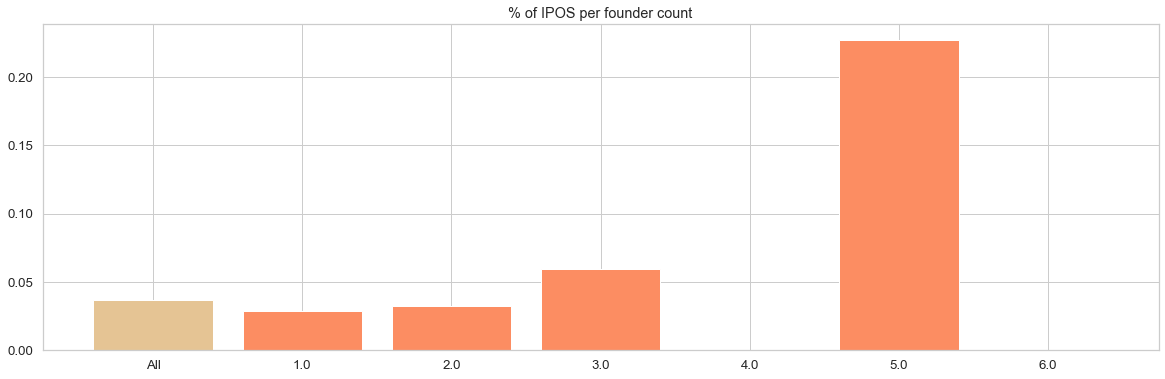

In [216]:
colors = [sns.color_palette("Set2")[6]]
colors.extend(6*[sns.color_palette("Set2")[1]])
plt.figure(figsize=(20,6))
plt.bar(pivot_founders.head(7).index.astype(str),height=pivot_founders.head(7)["ipo"], color=colors)
plt.title("% of IPOS per founder count")
plt.show()

### Predictors of Acquisition
> again seems like the trend is growing but what about 4 & 6 ? Should we do classification 1, 2, 3 , 4 + ?

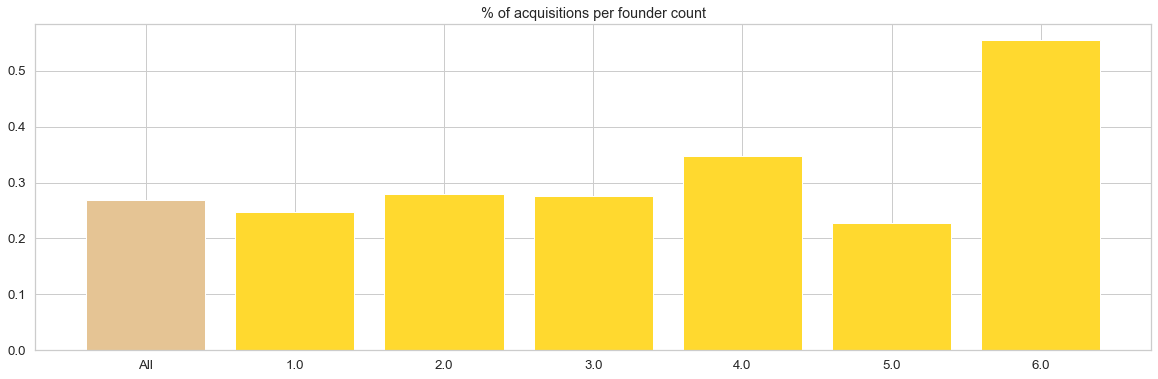

In [224]:
colors = [sns.color_palette("Set2")[6]]
colors.extend(6*[sns.color_palette("Set2")[5]])
plt.figure(figsize=(20,6))
plt.bar(pivot_founders.head(7).index.astype(str),height=pivot_founders.head(7)["acquisition"], color=colors)
plt.title("% of acquisitions per founder count")
plt.show()

### Predictors of no exit
Clear downward trend as number of founders increase !

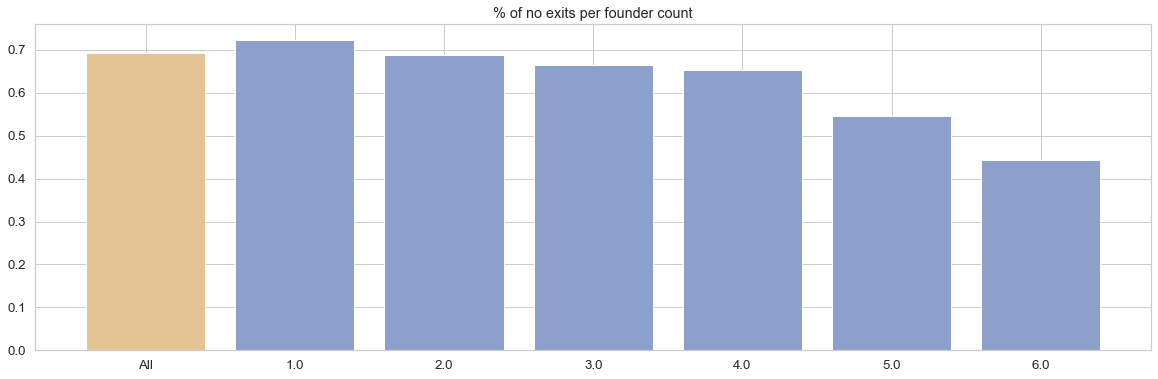

In [226]:
colors = [sns.color_palette("Set2")[6]]
colors.extend(6*[sns.color_palette("Set2")[2]])
plt.figure(figsize=(20,6))
plt.bar(pivot_founders.head(7).index.astype(str),height=pivot_founders.head(7)["no exit"], color=colors)
plt.title("% of no exits per founder count")
plt.show()

### Conclusion: good feature!

## Female founder count

In [209]:
pivot_fem_founders = pd.pivot_table(companies, values='id', index=["n_female_founders"],
                    columns=['exit'], aggfunc= "count", margins = True)
pivot_fem_founders = pivot_fem_founders.fillna(0).sort_values(by = "All", ascending=False)
pivot_fem_founders.acquisition = pivot_fem_founders.acquisition/pivot_fem_founders.All
pivot_fem_founders.ipo = pivot_fem_founders.ipo/pivot_fem_founders.All
pivot_fem_founders["no exit"] = pivot_fem_founders["no exit"]/pivot_fem_founders.All

In [210]:
pivot_fem_founders

exit,acquisition,ipo,no exit,All
n_female_founders,,,,
All,0.270218,0.036585,0.693196,1558
0.0,0.277624,0.037293,0.685083,1448
1.0,0.178218,0.029703,0.792079,101
2.0,0.142857,0.000000,0.857143,7
3.0,0.000000,0.000000,1.000000,1
5.0,0.000000,0.000000,1.000000,1


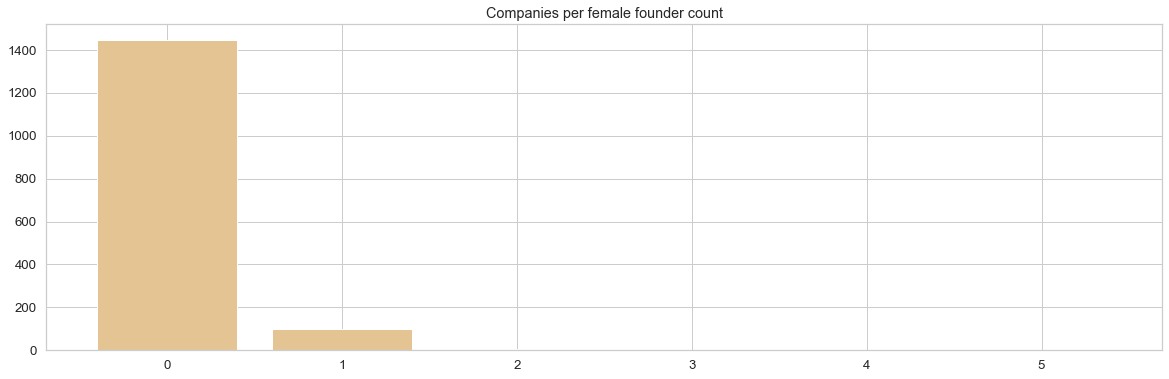

In [227]:
plt.figure(figsize=(20,6))
plt.bar(pivot_fem_founders.head(7).drop("All").index,height=pivot_fem_founders.head(7).drop("All")["All"], color=sns.color_palette("Set2")[6])
plt.title("Companies per female founder count")
plt.show()

### Predictors of IPO
> seems like the trend is growing but what about 4 & 6 ? Should we do classification 1, 2, 3 , 4 + ?

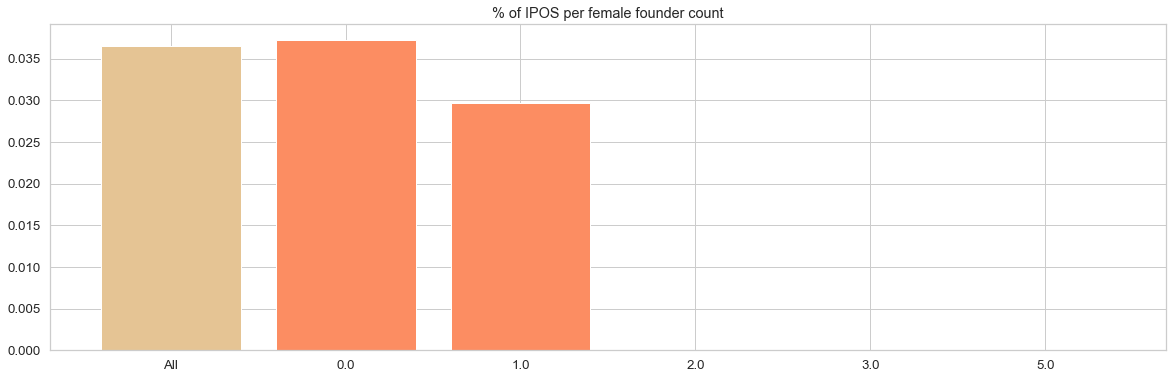

In [228]:
colors = [sns.color_palette("Set2")[6]]
colors.extend(6*[sns.color_palette("Set2")[1]])
plt.figure(figsize=(20,6))
plt.bar(pivot_fem_founders.head(7).index.astype(str),height=pivot_fem_founders.head(7)["ipo"], color=colors)
plt.title("% of IPOS per female founder count")
plt.show()

### Predictors of Acquisition
> again seems like the trend is growing but what about 4 & 6 ? Should we do classification 1, 2, 3 , 4 + ?

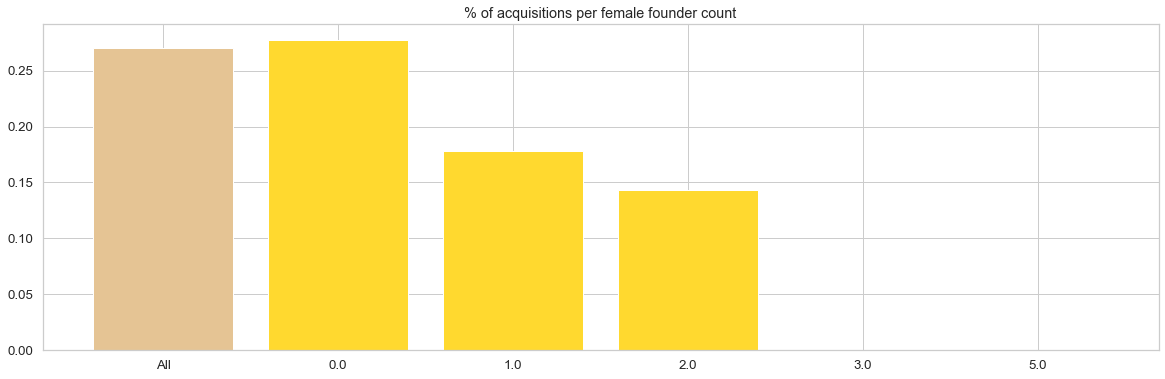

In [229]:
colors = [sns.color_palette("Set2")[6]]
colors.extend(6*[sns.color_palette("Set2")[5]])
plt.figure(figsize=(20,6))
plt.bar(pivot_fem_founders.head(7).index.astype(str),height=pivot_fem_founders.head(7)["acquisition"], color=colors)
plt.title("% of acquisitions per female founder count")
plt.show()

### Predictors of no exit
Clear upward trend as number of female founders increase !

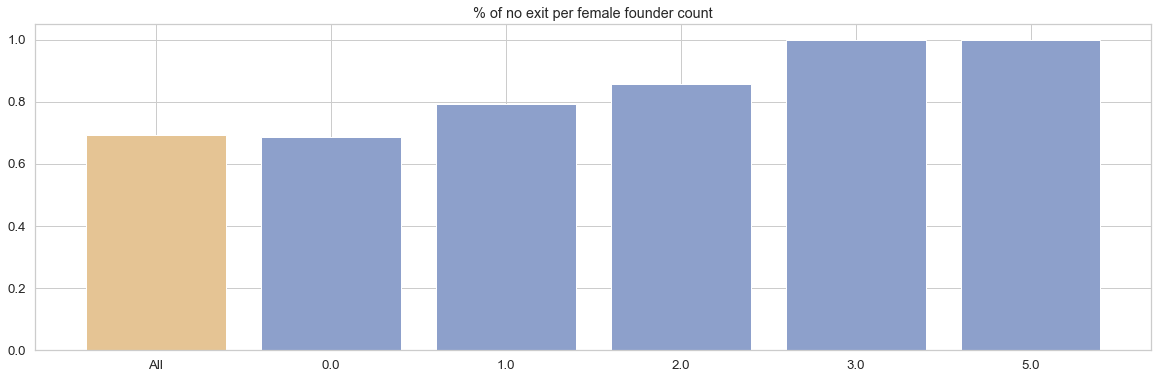

In [231]:
colors = [sns.color_palette("Set2")[6]]
colors.extend(6*[sns.color_palette("Set2")[2]])
plt.figure(figsize=(20,6))
plt.bar(pivot_fem_founders.head(7).index.astype(str),height=pivot_fem_founders.head(7)["no exit"], color=colors)
plt.title("% of no exit per female founder count")
plt.show()

### Conclusion: good feature.. unfortunately

## Female ratio

In [345]:
def female_ratio_classes(x):
    if x==0:
        return 0
    if x>0:
        return 1

In [346]:

companies["female_ratio_cl"] = companies["female_ratio"].map(female_ratio_classes)

In [347]:
pivot_fem_ratio = pd.pivot_table(companies, values='id', index=["female_ratio_cl"],
                    columns=['exit'], aggfunc= "count", margins = True)
pivot_fem_ratio = pivot_fem_ratio.fillna(0)#.sort_values(by = "All", ascending=False)
pivot_fem_ratio.acquisition = pivot_fem_ratio.acquisition/pivot_fem_ratio.All
pivot_fem_ratio.ipo = pivot_fem_ratio.ipo/pivot_fem_ratio.All
pivot_fem_ratio["no exit"] = pivot_fem_ratio["no exit"]/pivot_fem_ratio.All

In [348]:
pivot_fem_ratio

exit,acquisition,ipo,no exit,All
female_ratio_cl,,,,
0.0,0.277624,0.037293,0.685083,1448
1.0,0.172727,0.027273,0.800000,110
All,0.270218,0.036585,0.693196,1558


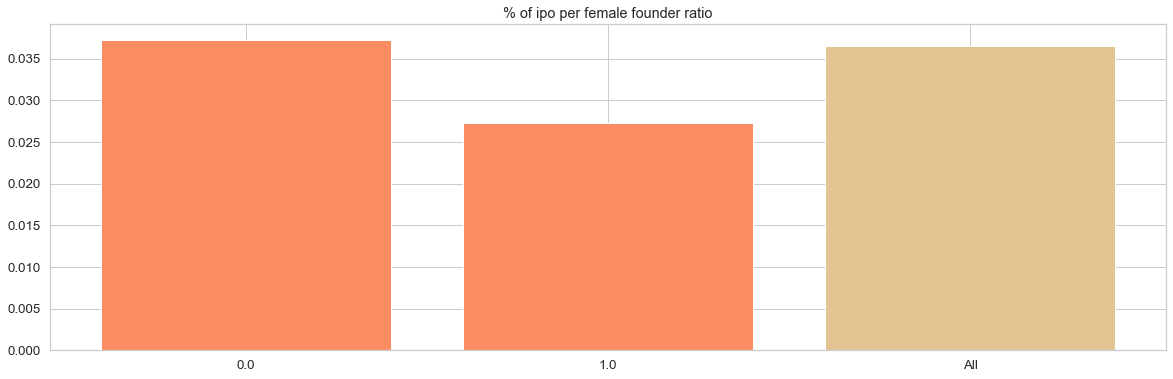

In [349]:
colors = 2*[sns.color_palette("Set2")[1]]
colors.extend([sns.color_palette("Set2")[6]])
plt.figure(figsize=(20,6))
plt.bar(pivot_fem_ratio.head(10).index.astype(str),height=pivot_fem_ratio.head(10)["ipo"], color=colors)
plt.title("% of ipo per female founder ratio")
plt.show()

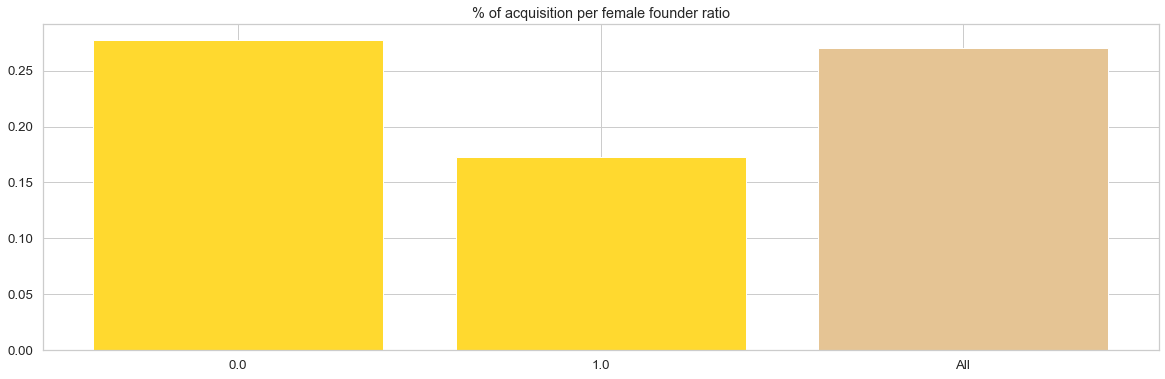

In [350]:
colors = 2*[sns.color_palette("Set2")[5]]
colors.extend([sns.color_palette("Set2")[6]])
plt.figure(figsize=(20,6))
plt.bar(pivot_fem_ratio.head(10).index.astype(str),height=pivot_fem_ratio.head(10)["acquisition"], color=colors)
plt.title("% of acquisition per female founder ratio")
plt.show()

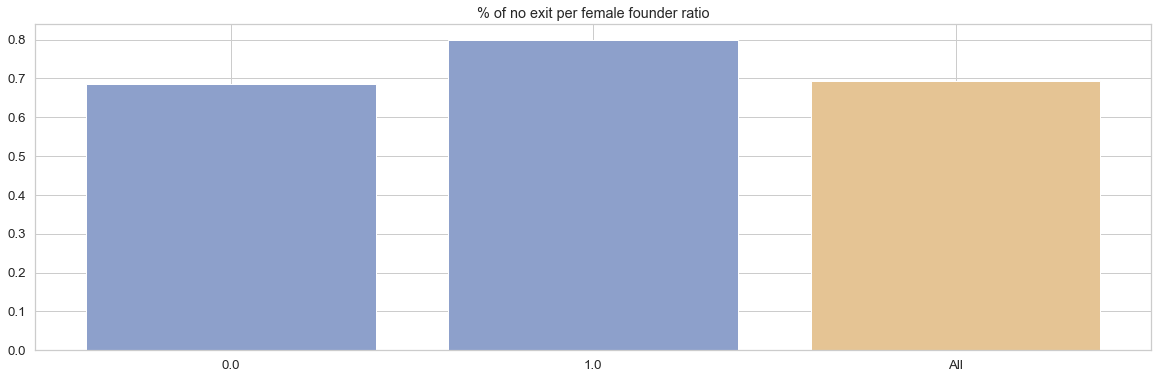

In [351]:
colors = 2*[sns.color_palette("Set2")[2]]
colors.extend([sns.color_palette("Set2")[6]])
plt.figure(figsize=(20,6))
plt.bar(pivot_fem_ratio.head(10).index.astype(str),height=pivot_fem_ratio.head(10)["no exit"], color=colors)
plt.title("% of no exit per female founder ratio")
plt.show()

## Schools

In [322]:
companies["top_school"] = (companies["top_5_bool"] + companies["top_20_bool"]+ companies["top_50_bool"]).map(lambda x: 1 if x>0 else 0)

In [342]:
pivot_school = pd.pivot_table(companies, values='id', index=["top_school"],
                    columns=['exit'], aggfunc= "count", margins = True)
pivot_school = pivot_school.fillna(0)#.sort_values(by = "All", ascending=False)
pivot_school.acquisition = pivot_school.acquisition/pivot_school.All
pivot_school.ipo = pivot_school.ipo/pivot_school.All
pivot_school["no exit"] = pivot_school["no exit"]/pivot_school.All

In [343]:
pivot_school

exit,acquisition,ipo,no exit,All
top_school,,,,
0,0.210468,0.015481,0.774051,2713
1,0.303030,0.056818,0.640152,528
All,0.225548,0.022215,0.752237,3241


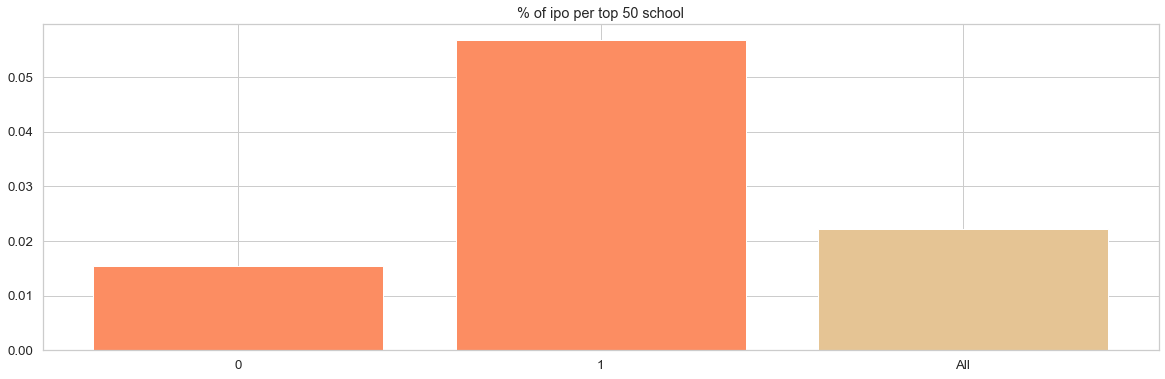

In [344]:
colors = 2*[sns.color_palette("Set2")[1]]
colors.extend([sns.color_palette("Set2")[6]])
plt.figure(figsize=(20,6))
plt.bar(pivot_school.head(10).index.astype(str),height=pivot_school.head(10)["ipo"], color=colors)
plt.title("% of ipo per top 50 school")
plt.show()

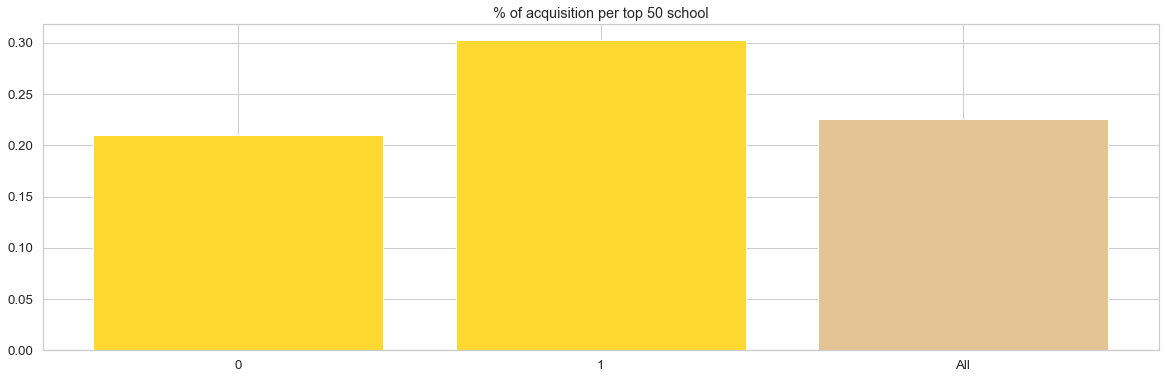

In [354]:
colors = 2*[sns.color_palette("Set2")[5]]
colors.extend([sns.color_palette("Set2")[6]])
plt.figure(figsize=(20,6))
plt.bar(pivot_school.head(10).index.astype(str),height=pivot_school.head(10)["acquisition"], color=colors)
plt.title("% of acquisition per top 50 school")
plt.show()

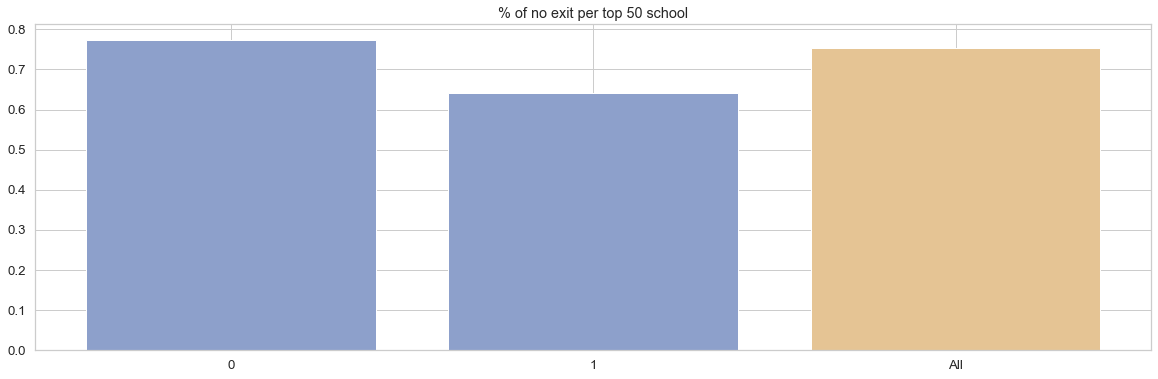

In [333]:
colors = 2*[sns.color_palette("Set2")[2]]
colors.extend([sns.color_palette("Set2")[6]])
plt.figure(figsize=(20,6))
plt.bar(pivot_school.head(10).index.astype(str),height=pivot_school.head(10)["no exit"], color=colors)
plt.title("% of no exit per top 50 school")
plt.show()

## Computer Science

In [372]:
pivot_study = pd.pivot_table(companies, values='id', index=["cs_bool"],
                    columns=['exit'], aggfunc= "count", margins = True)
pivot_study = pivot_study.fillna(0)#.sort_values(by = "All", ascending=False)
pivot_study.acquisition = pivot_study.acquisition/pivot_study.All
pivot_study.ipo = pivot_study.ipo/pivot_study.All
pivot_study["no exit"] = pivot_study["no exit"]/pivot_study.All

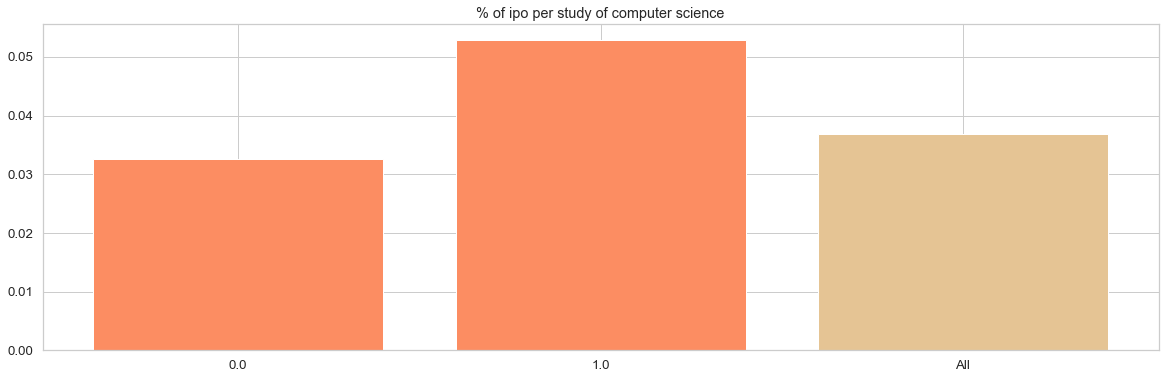

In [373]:
colors = 2*[sns.color_palette("Set2")[1]]
colors.extend([sns.color_palette("Set2")[6]])
plt.figure(figsize=(20,6))
plt.bar(pivot_study.head(10).index.astype(str),height=pivot_study.head(10)["ipo"], color=colors)
plt.title("% of ipo per study of computer science")
plt.show()

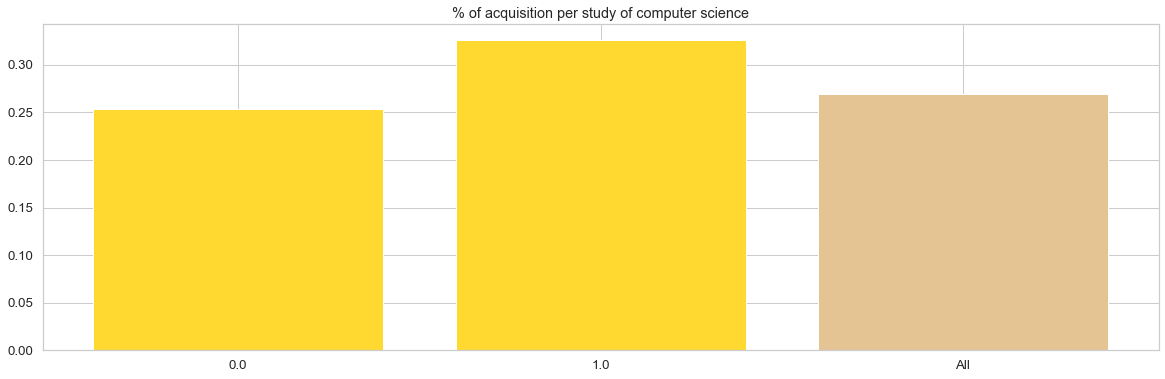

In [374]:
colors = 2*[sns.color_palette("Set2")[5]]
colors.extend([sns.color_palette("Set2")[6]])
plt.figure(figsize=(20,6))
plt.bar(pivot_study.head(10).index.astype(str),height=pivot_study.head(10)["acquisition"], color=colors)
plt.title("% of acquisition per study of computer science")
plt.show()

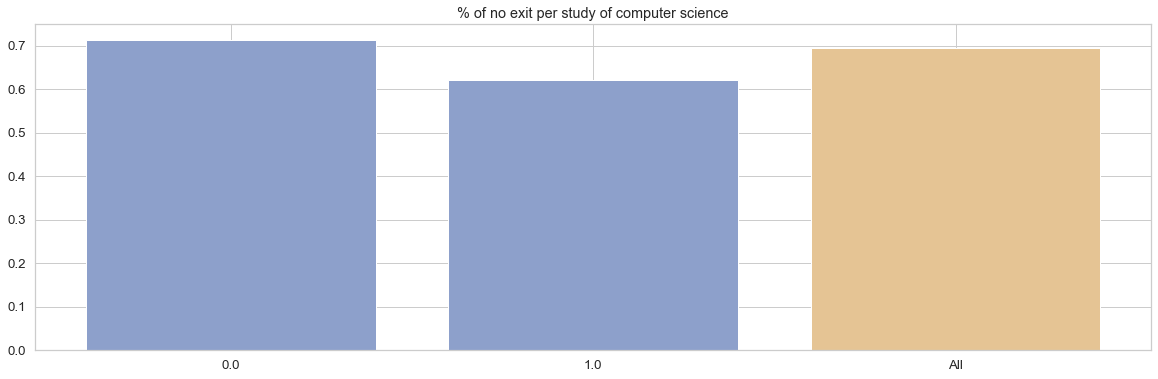

In [375]:
colors = 2*[sns.color_palette("Set2")[2]]
colors.extend([sns.color_palette("Set2")[6]])
plt.figure(figsize=(20,6))
plt.bar(pivot_study.head(10).index.astype(str),height=pivot_study.head(10)["no exit"], color=colors)
plt.title("% of no exit per study of computer science")
plt.show()

## MBA

In [380]:
pivot_study = pd.pivot_table(companies, values='id', index=["MBA_bool"],
                    columns=['exit'], aggfunc= "count", margins = True)
pivot_study = pivot_study.fillna(0)#.sort_values(by = "All", ascending=False)
pivot_study.acquisition = pivot_study.acquisition/pivot_study.All
pivot_study.ipo = pivot_study.ipo/pivot_study.All
pivot_study["no exit"] = pivot_study["no exit"]/pivot_study.All

In [385]:
pivot_study

exit,acquisition,ipo,no exit,All
MBA_bool,,,,
0.0,0.259848,0.031818,0.708333,1320
1.0,0.314286,0.060714,0.625000,280
All,0.269375,0.036875,0.693750,1600


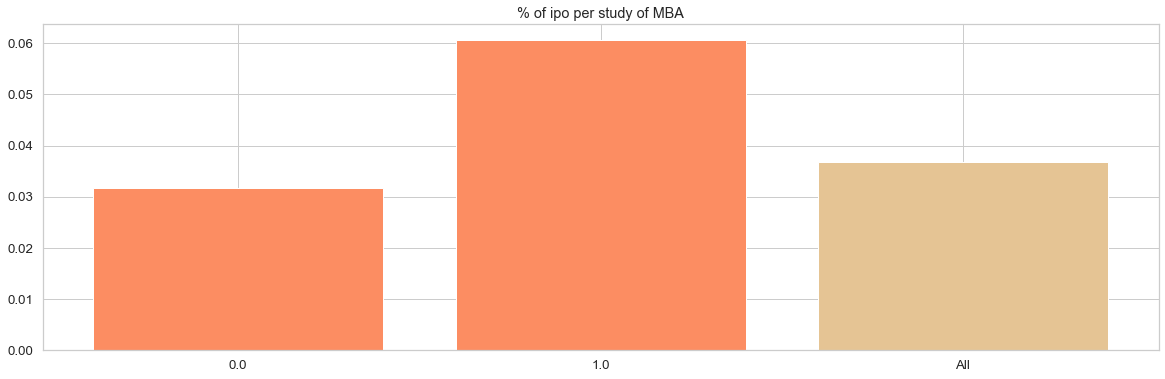

In [381]:
colors = 2*[sns.color_palette("Set2")[1]]
colors.extend([sns.color_palette("Set2")[6]])
plt.figure(figsize=(20,6))
plt.bar(pivot_study.head(10).index.astype(str),height=pivot_study.head(10)["ipo"], color=colors)
plt.title("% of ipo per study of MBA")
plt.show()

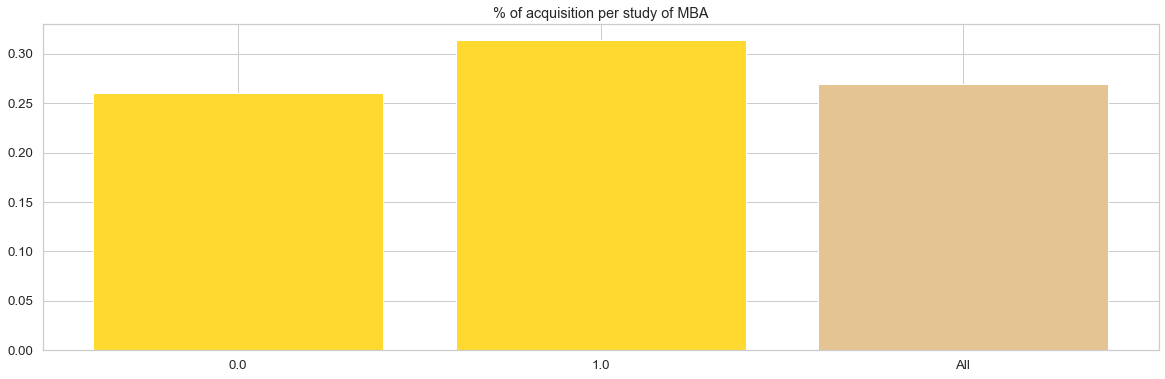

In [382]:
colors = 2*[sns.color_palette("Set2")[5]]
colors.extend([sns.color_palette("Set2")[6]])
plt.figure(figsize=(20,6))
plt.bar(pivot_study.head(10).index.astype(str),height=pivot_study.head(10)["acquisition"], color=colors)
plt.title("% of acquisition per study of MBA")
plt.show()

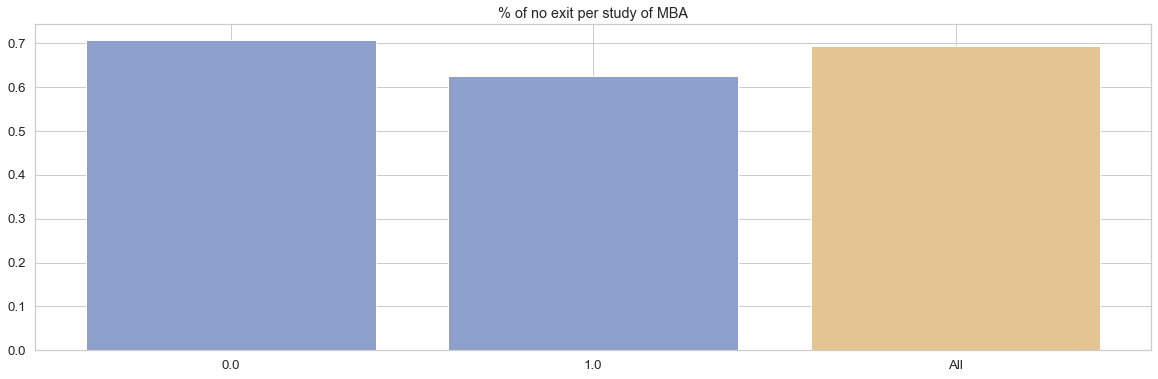

In [384]:
colors = 2*[sns.color_palette("Set2")[2]]
colors.extend([sns.color_palette("Set2")[6]])
plt.figure(figsize=(20,6))
plt.bar(pivot_study.head(10).index.astype(str),height=pivot_study.head(10)["no exit"], color=colors)
plt.title("% of no exit per study of MBA")
plt.show()

## Companies founded before

In [396]:
companies["comp_founded_before_bool"] = companies["mean_comp_founded_before"].map(lambda x: 1 if x>0 else 0)

In [406]:
pivot_exp = pd.pivot_table(companies, values='id', index=["comp_founded_before_bool"],
                    columns=['exit'], aggfunc= "count", margins = True)
pivot_exp = pivot_exp.fillna(0)#.sort_values(by = "All", ascending=False)
pivot_exp.acquisition = pivot_exp.acquisition/pivot_exp.All
pivot_exp.ipo = pivot_exp.ipo/pivot_exp.All
pivot_exp["no exit"] = pivot_exp["no exit"]/pivot_exp.All

In [407]:
pivot_exp

exit,acquisition,ipo,no exit,All
comp_founded_before_bool,,,,
0,0.222222,0.021905,0.755873,3150
1,0.340659,0.032967,0.626374,91
All,0.225548,0.022215,0.752237,3241


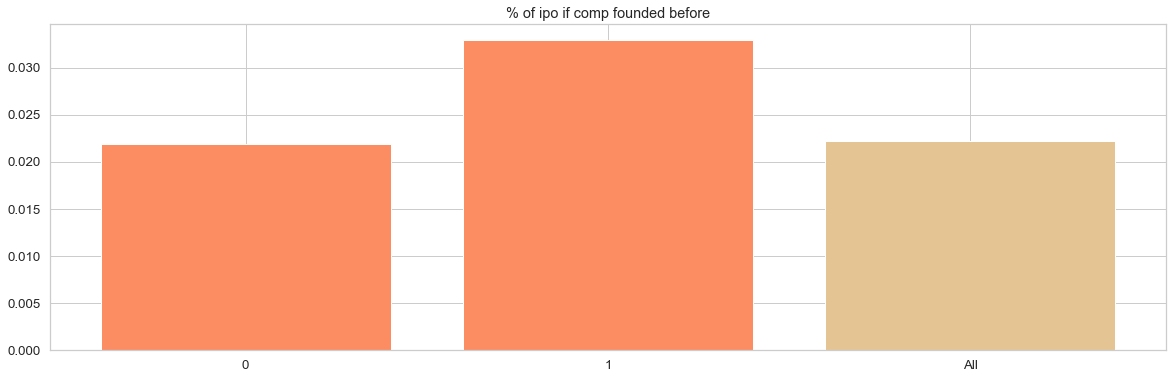

In [408]:
colors = 2*[sns.color_palette("Set2")[1]]
colors.extend([sns.color_palette("Set2")[6]])
plt.figure(figsize=(20,6))
plt.bar(pivot_exp.head(10).index.astype(str),height=pivot_exp.head(10)["ipo"], color=colors)
plt.title("% of ipo if comp founded before")
plt.show()

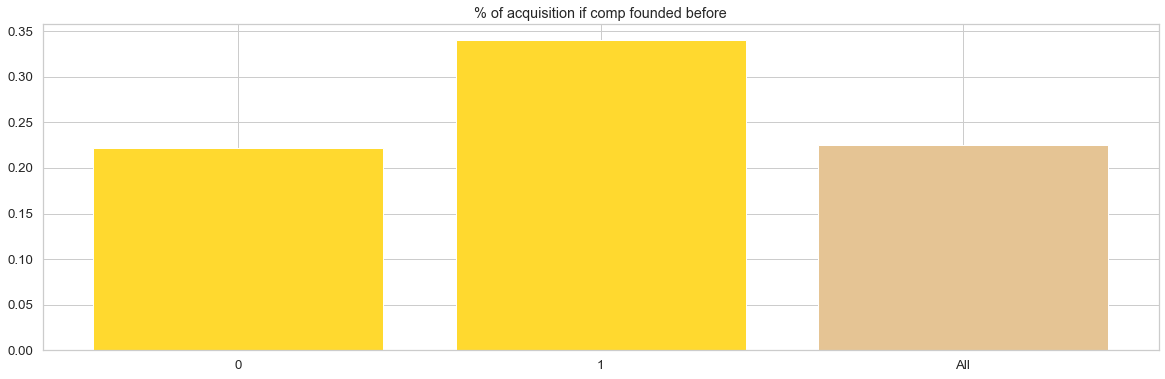

In [409]:
colors = 2*[sns.color_palette("Set2")[5]]
colors.extend([sns.color_palette("Set2")[6]])
plt.figure(figsize=(20,6))
plt.bar(pivot_exp.head(10).index.astype(str),height=pivot_exp.head(10)["acquisition"], color=colors)
plt.title("% of acquisition if comp founded before")
plt.show()

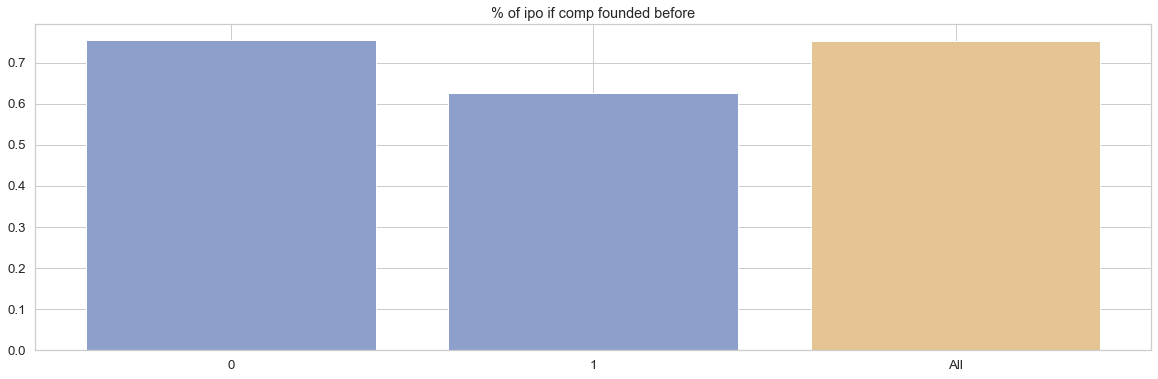

In [410]:
colors = 2*[sns.color_palette("Set2")[2]]
colors.extend([sns.color_palette("Set2")[6]])
plt.figure(figsize=(20,6))
plt.bar(pivot_exp.head(10).index.astype(str),height=pivot_exp.head(10)["no exit"], color=colors)
plt.title("% of ipo if comp founded before")
plt.show()

# Series A

In [129]:
## Investors (Participants)